In [178]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [181]:
s = 'Sarcasm_Headlines_Dataset.json'
data = pd.read_json(s, lines = True)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [183]:
#from above we gather that the dataset is composed of three attributes or features or columns
# out of which two are non-integer types and one is integer type

In [184]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [185]:
data['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

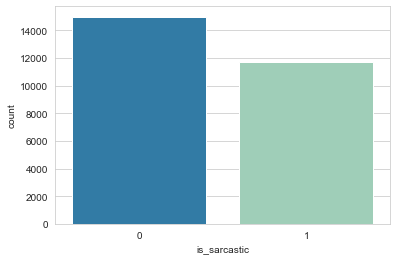

In [186]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=data, palette='YlGnBu_r')

In [187]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [188]:
#from this we gather that the first attribute is the link to headline(i.e., the sencond attribute)


#checking missing values if any
print(data.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [189]:
def remove_special_symbols(data):
    data['headline'] = data['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
    return data
def confusion_matrix(val,score):
    plt.figure(figsize=(9,9))
    sns.heatmap(val, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)
    plt.show()

In [190]:
data = remove_special_symbols(data)

In [191]:
#selecting features and labels
#if we carefully look at the above dataset
#we may see that article_link(i.e., the link to the news headline) does not seem to have any impact on the result(i.e., to find whether the headline is sarcastic or not)
#this means we can neglect it while selecting features
features = data['headline']
labels = data['is_sarcastic']

In [192]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x :' '.join([ps.stem(word) for word in x]))


In [193]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()


In [194]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [195]:
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
lsvc_predictions = lsvc.predict(features_test)
lsvc_cm = metrics.confusion_matrix(labels_test, lsvc_predictions)

lsvc_score = lsvc.score(features_test,labels_test)



# getting the score of train and test data
print(lsvc.score(features_train, labels_train)*100) # 90.98
print(lsvc.score(features_test, labels_test)*100)   # 83.60

90.98254049580262
83.60778443113772


In [196]:
# Using Gaussuan Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
gnb_predictions = gnb.predict(features_test)
gnb_cm = metrics.confusion_matrix(labels_test, gnb_predictions)

gnb_score = gnb.score(features_test,labels_test)



print(gnb.score(features_train, labels_train)*100)  # 78.39
print(gnb.score(features_test, labels_test)*100)    # 73.35

78.39041500807944
73.35329341317365


In [197]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)

rfc_predictions = rfc.predict(features_test)
rfc_cm = metrics.confusion_matrix(labels_test, rfc_predictions)

rfc_score = rfc.score(features_test,labels_test)




print(rfc.score(features_train, labels_train)*100)  # 98.84
print(rfc.score(features_test, labels_test)*100)    # 78.96

98.84522918062507
78.96706586826348


In [198]:
X=data['headline'].values
y=data['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [199]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [200]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [201]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=training_padded, y=y_train, batch_size=256, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/100
53/53 [==============================] - 2s 11ms/step - loss: 0.6945 - accuracy: 0.4712 - val_loss: 0.6927 - val_accuracy: 0.5613
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5268 - val_loss: 0.6917 - val_accuracy: 0.5643
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5568 - val_loss: 0.6908 - val_accuracy: 0.5631
Epoch 4/100
53/53 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.5551 - val_loss: 0.6891 - val_accuracy: 0.5628
Epoch 5/100
53/53 [==============================] - 0s 9ms/step - loss: 0.6897 - accuracy: 0.5530 - val_loss: 0.6874 - val_accuracy: 0.5627
Epoch 6/100
53/53 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.5571 - val_loss: 0.6859 - val_accuracy: 0.5626
Epoch 7/100
53/53 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5591 - val_loss: 0.6845 - val_accuracy: 0.5638
Epoch 8/100


In [202]:
hist = model.history.history
n_epochs_best = len(hist['loss'])

In [203]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,n_epochs_best+1)
df_m.index=df_m['Epoch']
df_m


,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.694075,0.478958,0.692706,0.561288,1
2,0.692422,0.535495,0.691716,0.564283,2
3,0.691568,0.552718,0.690831,0.563085,3
4,0.690339,0.552494,0.689123,0.562785,4
5,0.689098,0.555714,0.687389,0.562711,5
6,0.687500,0.558110,0.685909,0.562561,6
7,0.686310,0.559982,0.684477,0.563759,7
8,0.684911,0.564325,0.682578,0.571097,8
9,0.682057,0.579152,0.679100,0.583077,9


In [204]:
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])


209/209 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8567
Test accuracy: 0.8566828966140747


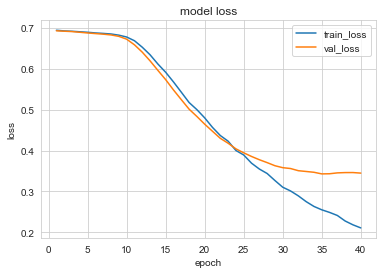

In [205]:
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

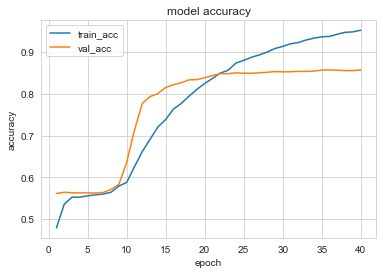

In [206]:
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

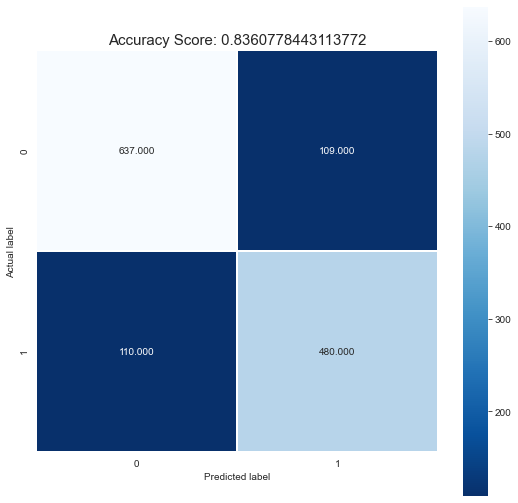

In [207]:
#LinearSVC
confusion_matrix(lsvc_cm,lsvc_score)


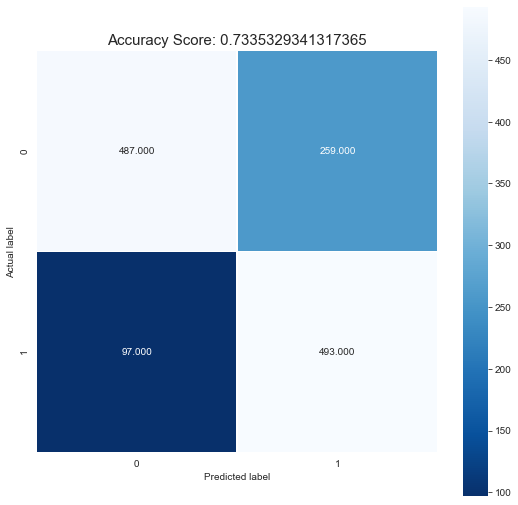

In [208]:
#Gaussuan Naive Bayes
confusion_matrix(gnb_cm,gnb_score)


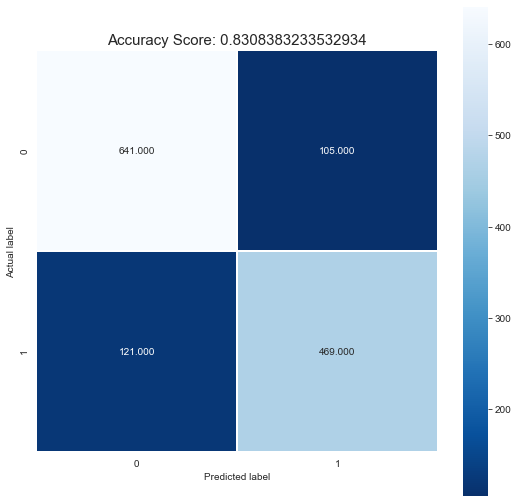

In [209]:
#Logistic Regression
confusion_matrix(lr_cm,lr_score)


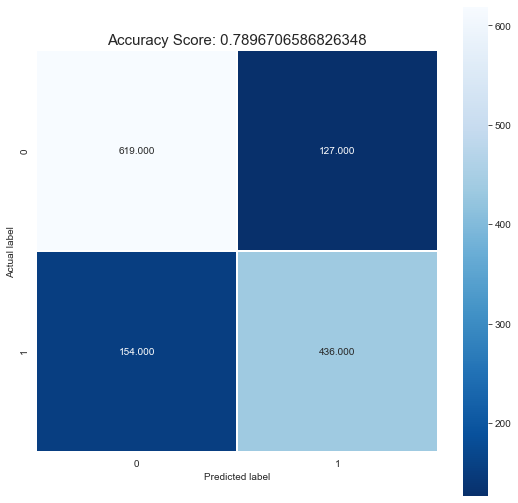

In [210]:
#Random Forest Classifier
confusion_matrix(rfc_cm,rfc_score)